# E7 - Multi-Order Cumulants Analysis (MOCA) for on-time ratio and brightness extraction

## 1. Introduction
#### Theory background
Multi-order cumulants analysis (MOCA) is a method to extract photo-physical properites and spatial distribution of emitters at high labeling density using cumulants of multiples orders.

In MOCA, multiple order of auto- and cross-cumulants with multiple pixel combinations are calculated. The ratio between the second order auto- and cross-cumulants $\frac{XC_2}{AC_2}$ is used to estimate point-spread-function (psf). Then, MOCA finds the relationship between cumulants, psf and emitters' photo-physical properties, and use this relationship to estimate emitters' blinking on-time ratio $\rho$ and on-state brightness $\epsilon$. For more explanation and derivation for SOFI and MOCA specifically, please refer to this [dissertation](https://escholarship.org/uc/item/5xs5v4qm#main).

#### What's included in this notebook
In this notebook, we demonstrate that **moca** successfully extracts photo-physical properties of emitters with different conditions (e.g. on-time ratio, brightness and labeling density) on simulation datasets. We provide 4 simulation examples to demonstrate its perforamnce.

#### Relevant dataset
We used the following datasets in this notebook:
- 3Emitters_frame5000_Emi3_close.tif
- SlowVaryingRho_frame2000_Emi51.tif
- RndomCurves_frame15000_rho04.tif
- combined_18curves.tif

The datasets are availble from [figshare](https://figshare.com/s/47d97a2df930380c96bb).



In [1]:
# import all the relevant packages.
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from pysofi import visualization
import copy

# import the moca module that is now kept in the functions folder of the pysofi package.
from functions import moca

%matplotlib inline
%load_ext autoreload
%autoreload 2

Loading BokehJS ...

Loading BokehJS ...

## Example 1 - Three emitters.

Here we use the same simulation as in this [demo](https://github.com/xiyuyi-at-LLNL/pysofi/blob/master/Notebooks/CuspArtifactsDemo1_3Emitters-Demo-save-and-object.ipynb). There are three adjacent blinking emitters with the same on-state brightness, but with on-time ratios of 0.7474, 0.4268, and 0.1134 respectively.

Except filename and filepath, there are several other inputs needed for **moca**. If the whole tiff video do not need to be processed, the user can define the start and end <code>frames</code> for MOCA analysis. <code>tauSeries</code> is the time lag for cross-cumulants calculation. <code>psf_dim</code> is user's initial estimate for the psf size. <code>res</code> is the resolution for the fitting step to determine the most possible $\rho$ and $\epsilon$ values for each pixel. The larger the resolution, the more precise the estimation would be at the cost of increased computation time.

In [2]:
# define path and parameters
filepath = '../sampledata/simulations'
filename = '3Emitters_frame5000_Emi3_close.tif'
frames = [0, 1000]
tauSeries = [0, 0, 0, 0, 0, 0, 0]
psf_dim = (301, 301)
res = 1000

# use the moca module to perform the moca analysis
ac, rho_map, eps_map = moca.moca(filename, filepath, tauSeries, frames, psf_dim, res)

Calculating the 2-order moment ...
[==============================] 100.0%

[==============================] 100.0%



The result form MOCA analysis includes three matrixes. 
- ac is the auto-cumulants. 
- rho_map is the matrix for the spatial distribution of $\rho_{on}$.
- esp_map is the matrix for the spatial distribution on brightness of the emitters.

We recommend visualizing the result by using AC as a transparency map for the final image to highlight the feature of interest, and using either rho_map and esp_map as the colormap to highlight the the two spatial variables.

Other transparency maps can be used as long as the feature of interest can be highlighted reasonably.


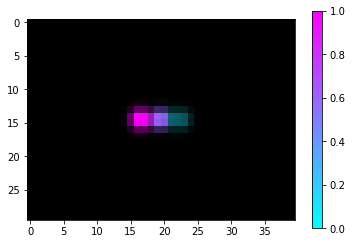

In [3]:
# first, lets visualize the on-time ratio distribution using colormap.
rho_map_color = visualization.add_transmap(rho_map, ac[2], 'cool')
plt.imshow(rho_map_color, cmap='cool')
plt.colorbar()

Note that the ground truth on-time ratios ($\rho$) of the three emitters (from left to right) are 0.7474, 0.4268, and 0.1134 respectively, which is successfully recovered through the MCOA analysis. 

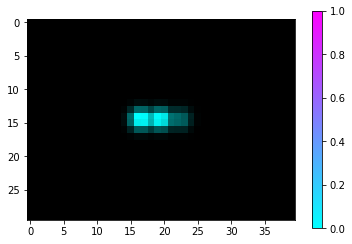

In [4]:
# second, lets visualize the brightness distribution using colormap.
eps_map_color = visualization.add_transmap(eps_map, ac[2], 'cool')
plt.imshow(eps_map_color, cmap='cool')
plt.colorbar()

Note tha the ground truth brightness of the 3 emitteres are identical, which is in agreement with the MOCA result.

## Example 2 - 50 Emitters with Slowly Varying $\rho$.

Here we use the same simulation as in this [demo](https://github.com/xiyuyi-at-LLNL/pysofi/blob/master/Notebooks/E12_CuspArtifactsDemo2_SlowVaryingRho.ipynb). A semicircle is populated with emitters having  𝜌  values uniformed ranging from 0.01 (top) to 0.99 (bottom). 

In [5]:
# define path and parameters
filepath = '../sampledata/simulations'
filename = 'SlowVaryingRho_frame2000_Emi51.tif'
frames = [0, 2000]
tauSeries = [0, 0, 0, 0, 0, 0, 0]
psf_dim = (101, 101)
res = 1500

ac2, rho_map2, eps_map2 = moca.moca(filename, filepath, tauSeries, frames, psf_dim, res)

Calculating the 2-order moment ...
[==============================] 100.0%

[==============================] 100.0%



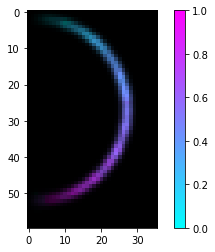

In [6]:
# first, lets visualize the on-time ratio distribution using colormap.
rho_map_color2 = visualization.add_transmap(rho_map2, ac2[2], 'cool')
plt.imshow(rho_map_color2, cmap='cool')
plt.colorbar()

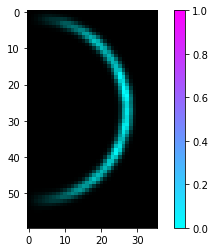

In [7]:
# second, lets visualize the brightness distribution using colormap.
eps_map_color2 = visualization.add_transmap(eps_map2, ac2[2], 'cool')
plt.imshow(eps_map_color2, cmap='cool')
plt.colorbar()

As we can see, the change of calculated photo-physical properties of emitters along the semicircle matches the simulation input, demonstrating the great performance of MOCA.

## Example 3 - Random Curves with $\rho = 0.322$.

In this example, random curves are generated and labeled with emitters with $\rho = 0.322$.

In [8]:
# define path and parameters
filepath = '../sampledata/simulations'
filename = 'RndomCurves_frame15000_rho04.tif'
frames = [0, 7000]
tauSeries = [0, 0, 0, 0, 0, 0, 0]
psf_dim = (301, 301)
res = 500

ac3, rho_map3, eps_map3 = moca.moca(filename, filepath, tauSeries, frames, psf_dim, res)

Calculating the 2-order moment ...
[==============================] 100.0%

[==============================] 100.0%



$\rho$ value of each pixel can be visualized dierctly with <code>visualization.bokeh_visualization</code>. By adding the second-order cumulant reconstruction as the transparency map. we select and study only the feature of interest.

In [9]:
visualization.bokeh_visualization(rho_map3)

Loading BokehJS ...

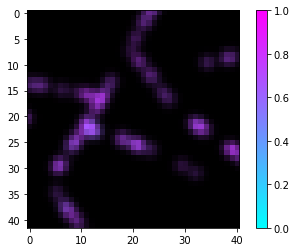

In [10]:
rho_map_color3 = visualization.add_transmap(rho_map3, ac3[2], 'cool')
plt.imshow(rho_map_color3, cmap='cool')
plt.colorbar()

## Example 4 - Crossing-over random curves with $\rho = 0.3, 0.5, 0.7$.

In this example, simulated crossing random curves with different $\rho$'s are generated. There are three $\rho$ values: 0.3, 0.5 and 0.7. For each $\rho$, there are three curves.


We first define the path and perfrom MOCA calculations for the dataset:

In [313]:
# define path and parameters
filepath = '../sampledata/simulations/moca'
filename = 'combined_18curves_diffeps.tif'
frames = [0, 6000]
tauSeries = [0, 0, 0, 0, 0, 0, 0]
psf_dim = (301, 301)
res = 1500

ac4, rho_map4, eps_map4 = moca.moca(filename, filepath, tauSeries, frames, psf_dim, res)

Calculating the 2-order moment ...
[==============================] 100.0%

[==============================] 100.0%



Now we can check the results of the rho distribution

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5,1,'blinking on-timer ratio ($\\rho$) distribution')

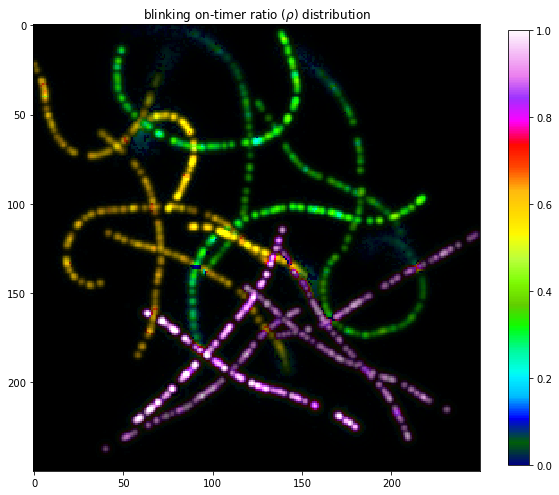

In [296]:
rho_map_color4 = visualization.add_transmap(rho_map4, ac4[2]**0.5, 'gist_ncar')
plt.figure(figsize=(10,10))
plt.imshow(rho_map_color4*2, cmap='gist_ncar')
plt.colorbar(shrink=0.8)
plt.title(r'blinking on-timer ratio ($\rho$) distribution')

We can also check the results of the brightness distribution

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 1080x360 with 0 Axes>

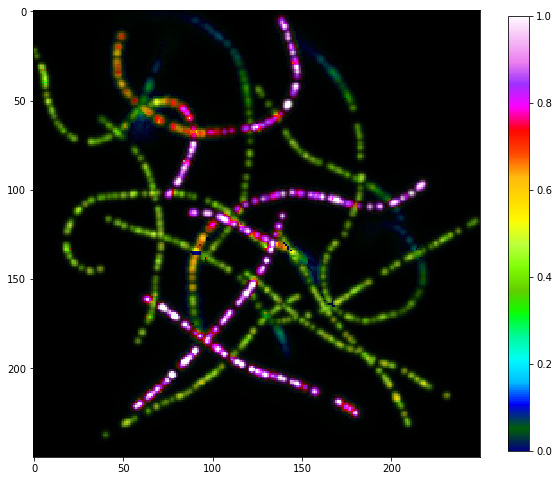

<Figure size 1080x360 with 0 Axes>

In [350]:
# plot the results of the brightness distribution
k=copy.deepcopy(eps_map4)
sat=80
k[np.where(k>sat)]=sat
k=k-np.min(k.ravel())
k=k/np.max(k.ravel())
eps_map_color4 = visualization.add_transmap(k/np.max(k.ravel()), ac4[2]**0.5, 'gist_ncar')
plt.figure(figsize=(10,10))
plt.imshow(eps_map_color4*2, cmap='gist_ncar')
plt.colorbar(shrink=0.8)
plt.figure(figsize=(15,5))

#### We can also use the visualization tool in pysofi to check the results:


In [352]:
# visualize the \rho distribution (on-time brightness)
visualization.bokeh_visualization_rgba(rho_map_color4*255,saturation_factor=2)

Loading BokehJS ...

In [353]:
# visualize the brightness distrubtion
visualization.bokeh_visualization_rgba(eps_map_color4*255,saturation_factor=2)

Loading BokehJS ...

Three curves with different $\rho$ can be clearly identified even at the intersections, showing the great performance of MOCA. The tricky condition is when two or more curved are overlapping, but we expect to get more accurate and artifact-free results when applying a high-oreder moment-reconstructed image as a transparency map. Better results can achieved with longer data acquisition, as discussed in [E6](https://github.com/xiyuyi-at-LLNL/pysofi/blob/master/Notebooks/E6_BleachingCorrection.ipynb).